In [23]:
import os
import sys 

PROJECT_ROOT = os.path.abspath('..')
sys.path.append(PROJECT_ROOT)

# Heart Predication

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# warnings filter
import warnings
warnings.filterwarnings("ignore")

### Get the Data

In [25]:
heart = pd.read_csv('../datasets/heart/train.csv')

### Quick Look of the Heart Dataset

In [26]:
heart.shape

(10000, 21)

In [27]:
heart.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [28]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [29]:
heart.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


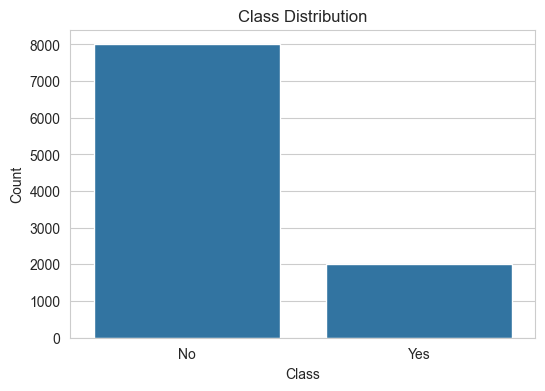

In [30]:
from src.visualization.plots import plot_class_distribution
plot_class_distribution(heart, 'Heart Disease Status')

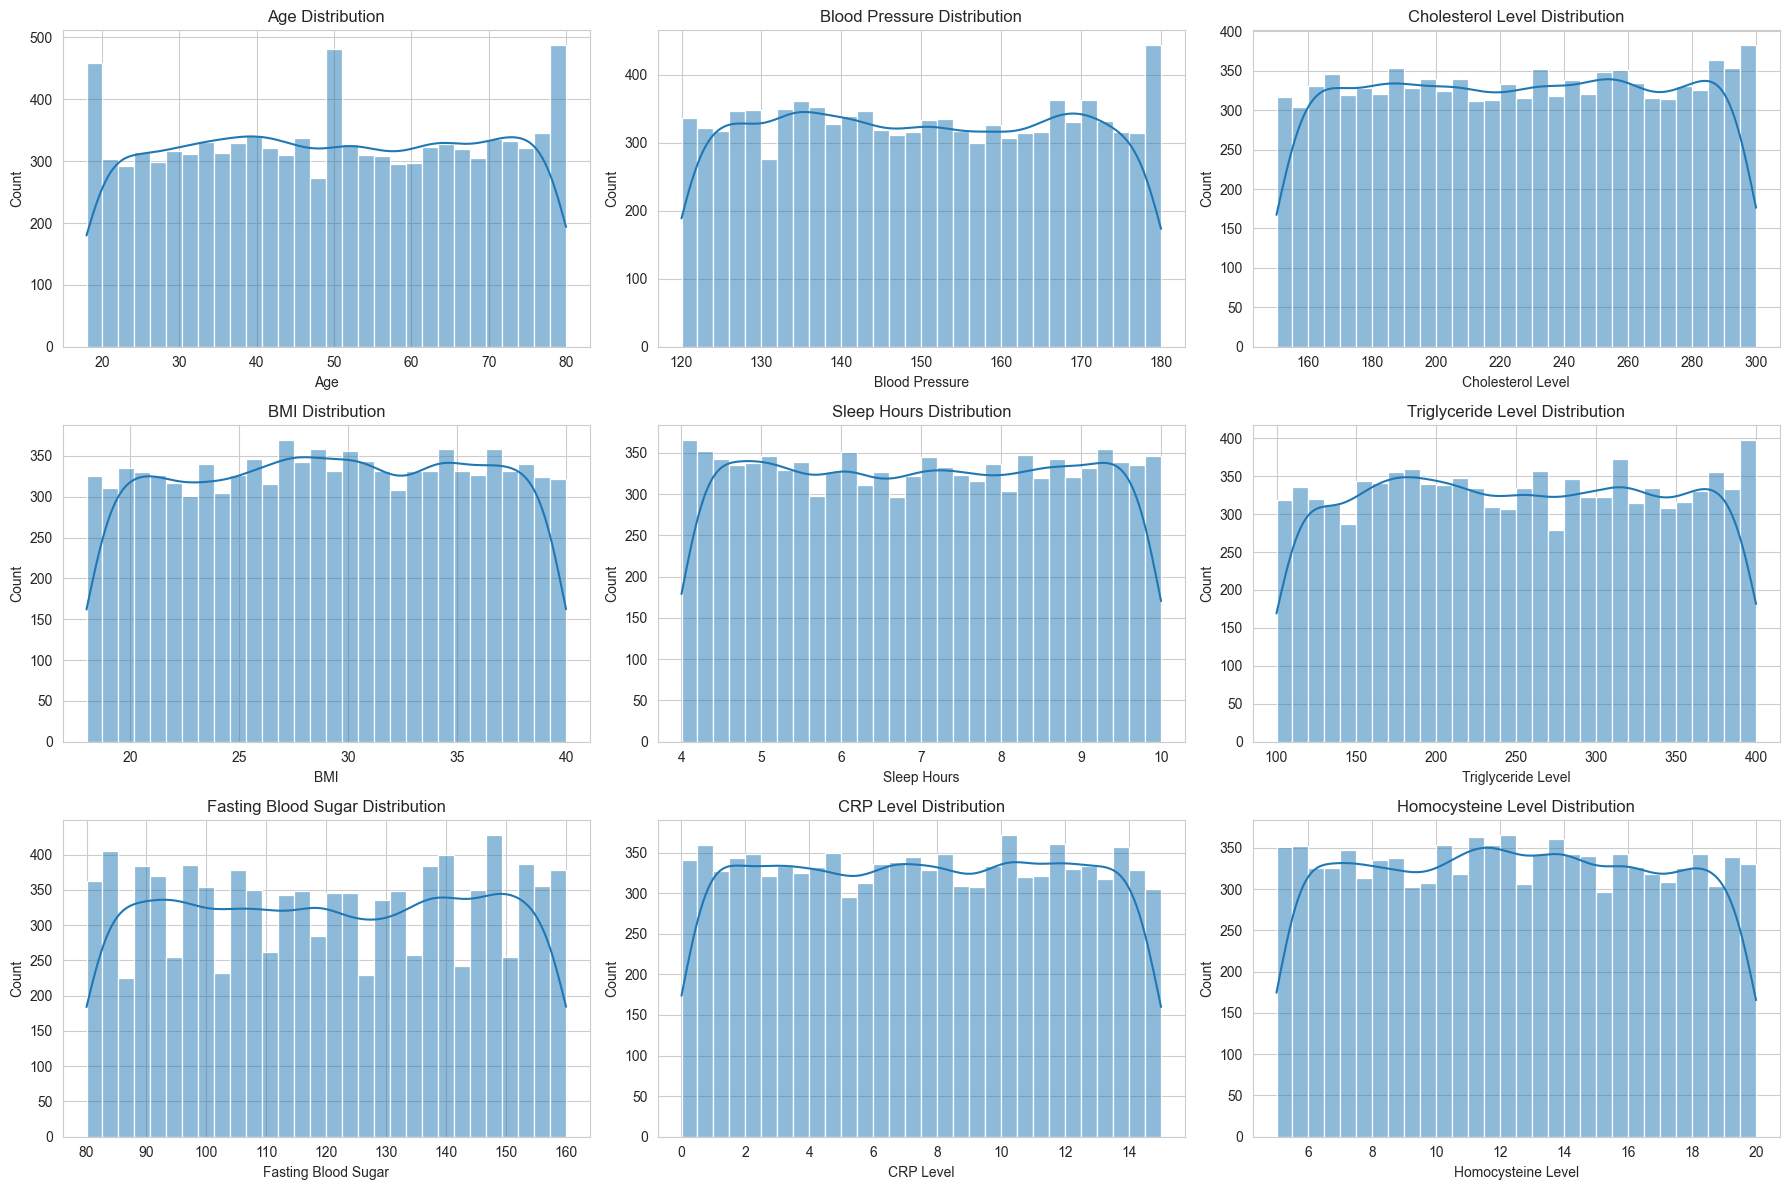

In [31]:
from src.visualization.plots import plot_multiple_features
plot_multiple_features(heart, 3)

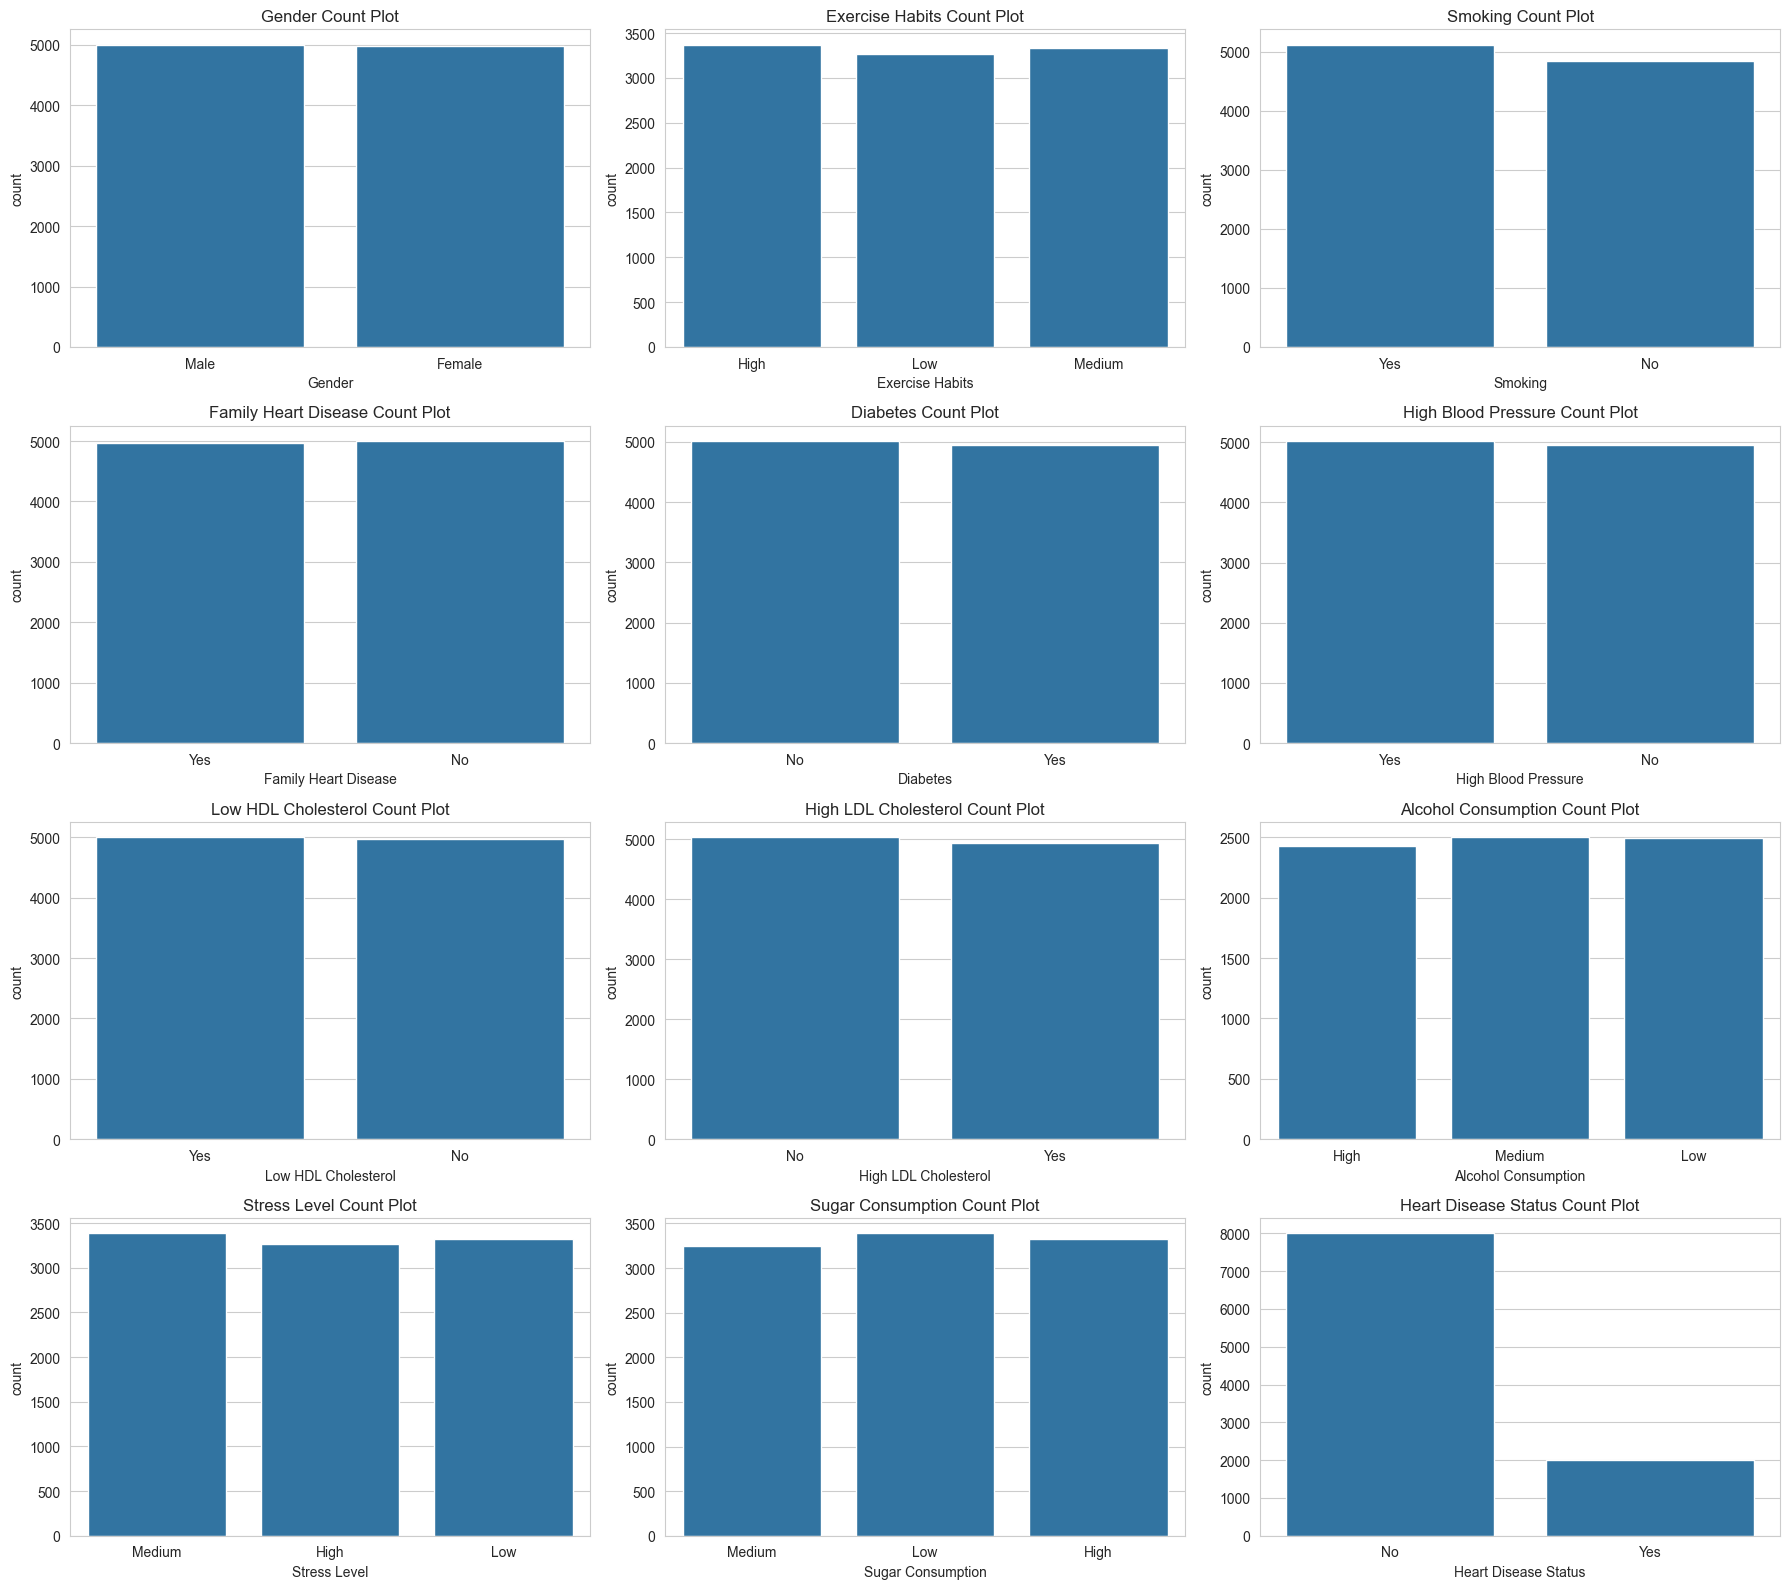

In [32]:
from src.visualization.plots import count_plot_multiple_features
count_plot_multiple_features(heart, 3)

### Cleaning

In [33]:
heart_copy = heart.copy()
heart_copy.rename(columns={'Heart Disease Status': 'heart_disease'}, inplace=True)

In [34]:
# separate numerical and categorical columns
from src.utils.main import separate_features_by_type
numeric_cols, categorical_cols = separate_features_by_type(heart_copy)
print({"NumericCols": numeric_cols},'\n', { "CategoricalCols": categorical_cols})

{'NumericCols': ['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours', 'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level']} 
 {'CategoricalCols': ['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level', 'Sugar Consumption', 'heart_disease']}


In [35]:
heart_copy.isnull().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
heart_disease              0
dtype: int64

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer



target_col = 'heart_disease'
alcohol_col = ['Alcohol Consumption']

other_cat_cols = [
    col for col in categorical_cols
    if col not in alcohol_col + [target_col]
]

clean = ColumnTransformer(
    transformers=[
        ('alcohol_imputer',
         SimpleImputer(strategy='constant', fill_value='Unknown'),
         alcohol_col),

        ('other_cat_imputer',
         SimpleImputer(strategy='most_frequent'),
         other_cat_cols),

        ('num_imputer',
         SimpleImputer(strategy='median'),
         numeric_cols)
    ],
    remainder='drop'
)


heart_cleaned_array = clean.fit_transform(heart_copy)


output_columns = alcohol_col + other_cat_cols + numeric_cols

heart_cleaned = pd.DataFrame(
    heart_cleaned_array,
    columns=output_columns,
    index=heart_copy.index
)

heart_cleaned[target_col] = heart_copy[target_col].values

heart_cleaned[numeric_cols] = heart_cleaned[numeric_cols].apply(
    pd.to_numeric, errors='coerce'
)


heart_cleaned.isnull().sum()
heart_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol Consumption   10000 non-null  object 
 1   Gender                10000 non-null  object 
 2   Exercise Habits       10000 non-null  object 
 3   Smoking               10000 non-null  object 
 4   Family Heart Disease  10000 non-null  object 
 5   Diabetes              10000 non-null  object 
 6   High Blood Pressure   10000 non-null  object 
 7   Low HDL Cholesterol   10000 non-null  object 
 8   High LDL Cholesterol  10000 non-null  object 
 9   Stress Level          10000 non-null  object 
 10  Sugar Consumption     10000 non-null  object 
 11  Age                   10000 non-null  float64
 12  Blood Pressure        10000 non-null  float64
 13  Cholesterol Level     10000 non-null  float64
 14  BMI                   10000 non-null  float64
 15  Sleep Hours         

In [37]:
# now we will convert binary categorical features to 0 and 1
from src.utils.main import convert_binary_categorical_to_numeric
binary_cols=["heart_disease","High LDL Cholesterol", "Low HDL Cholesterol", "Family Heart Disease", "Diabetes", "High Blood Pressure", "Smoking"]
convert_binary_categorical_to_numeric(heart_cleaned, binary_cols)

heart_cleaned["Gender"] = heart_cleaned["Gender"].map({"Male": 1, "Female": 0})

In [39]:
heart_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol Consumption   10000 non-null  object 
 1   Gender                10000 non-null  int64  
 2   Exercise Habits       10000 non-null  object 
 3   Smoking               10000 non-null  int64  
 4   Family Heart Disease  10000 non-null  int64  
 5   Diabetes              10000 non-null  int64  
 6   High Blood Pressure   10000 non-null  int64  
 7   Low HDL Cholesterol   10000 non-null  int64  
 8   High LDL Cholesterol  10000 non-null  int64  
 9   Stress Level          10000 non-null  object 
 10  Sugar Consumption     10000 non-null  object 
 11  Age                   10000 non-null  float64
 12  Blood Pressure        10000 non-null  float64
 13  Cholesterol Level     10000 non-null  float64
 14  BMI                   10000 non-null  float64
 15  Sleep Hours         

In [40]:
from src.utils.main import separate_features_by_type
numeric_cols, categorical_cols = separate_features_by_type(heart_cleaned)
print({"NumericCols": numeric_cols},'\n', { "CategoricalCols": categorical_cols})

{'NumericCols': ['Gender', 'Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol', 'Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours', 'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level', 'heart_disease']} 
 {'CategoricalCols': ['Alcohol Consumption', 'Exercise Habits', 'Stress Level', 'Sugar Consumption']}


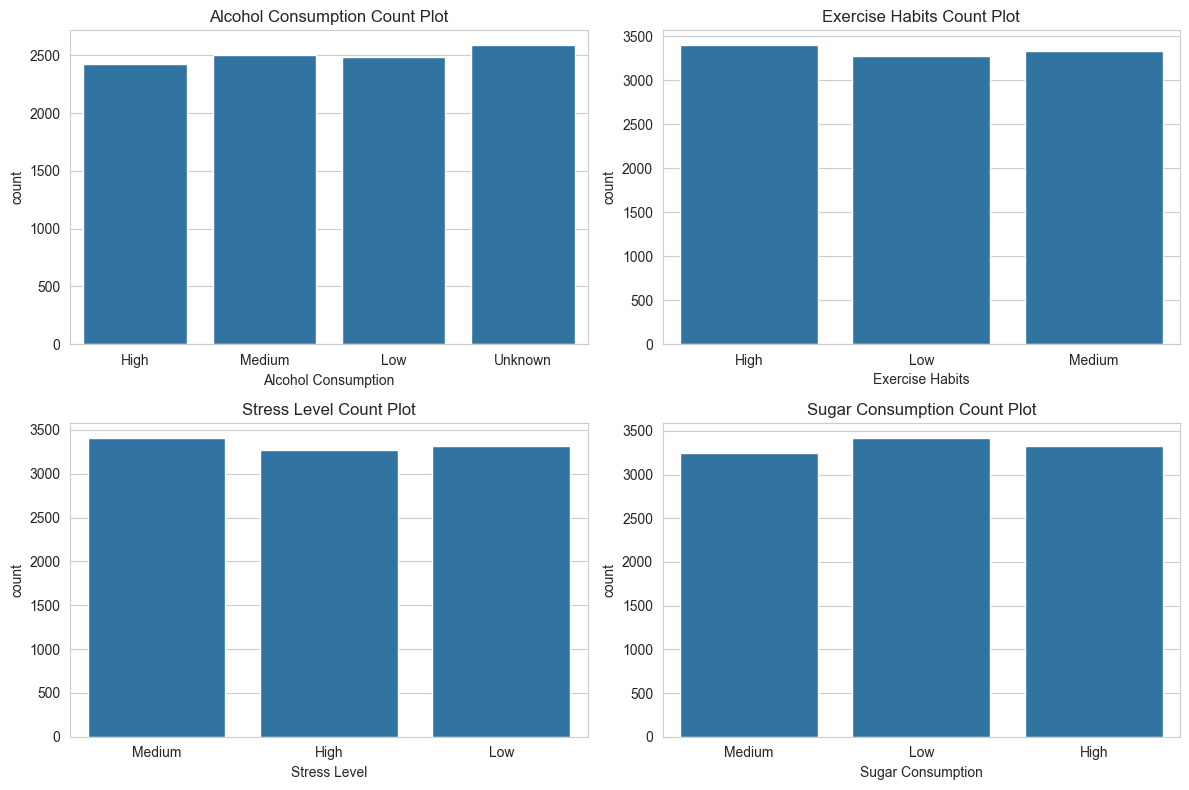

In [41]:
from src.visualization.plots import count_plot_multiple_features
count_plot_multiple_features(heart_cleaned)

In [42]:
for col in categorical_cols:
    if col != 'Alcohol Consumption':
        heart_cleaned[col] = heart_cleaned[col].map({'Low': 0,'Medium': 1,'High': 2})
        
    if col == 'Alcohol Consumption':
        heart_cleaned[col] = heart_cleaned[col].map({'Low': 0,'Medium': 1,'High': 2,'Unknown': -1})


In [47]:
from src.utils.main import corelation_data
corelation_data(heart_cleaned, 'heart_disease')

heart_disease           1.000000
BMI                     0.019682
Alcohol Consumption     0.012021
Stress Level            0.011332
Homocysteine Level      0.008302
High LDL Cholesterol    0.008201
Sugar Consumption       0.007303
Triglyceride Level      0.002904
Cholesterol Level       0.002703
Smoking                 0.002701
High Blood Pressure     0.002200
Exercise Habits         0.001776
Fasting Blood Sugar    -0.002248
Diabetes               -0.002700
Sleep Hours            -0.003821
Low HDL Cholesterol    -0.006000
CRP Level              -0.006009
Family Heart Disease   -0.007500
Age                    -0.009231
Blood Pressure         -0.013876
Gender                 -0.017200
Name: heart_disease, dtype: float64